## Anomaly detection : Non-Scaled Data

In [1]:
### autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### setting up the path
import sys
sys.path.append('../')

In [3]:
### importing the functions
from src.process_data.data import load_data, get_info, get_nan_duplicates_shape
from src.unsupervised_ml.pca import reduce_dim, get_shape
from src.unsupervised_ml.anomaly import find_threshold, find_contamination, outliers_isolation_forest, outliers_lof, outliers_dbscan

In [4]:
### setting up the data path for the scaled train and test 
### price column is excluded from anomaly detection
df_non_scaled_train_path = '../data/model_ready/non-scaled/train_non_scaled.csv'
df_non_scaled_test_path = '../data/model_ready/non-scaled/test_non_scaled.csv'

### *************** non_scaled data : Train ****************

In [5]:
### loading the data
df_non_scaled_train = load_data(df_non_scaled_train_path)
df_non_scaled_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,1,0,0,0,1,3,16,50,21,35,4


In [6]:
### get the nan values
get_nan_duplicates_shape(df_non_scaled_train)

Shape : (10683, 14) 
Duplicates : 470 
Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64


In [7]:
### reducing the dimensons to 2 using the pca
df_non_scaled_train = reduce_dim(df_non_scaled_train)
df_non_scaled_train

array([[ -3.66105359, -13.36269985],
       [ 26.34996186,  -7.61959325],
       [  0.30936807,   0.50455273],
       ...,
       [ -4.04090086,  -4.65063037],
       [  6.7970357 , -13.62754849],
       [ 31.36378226,  -7.75623546]])

In [8]:
### veryfying the shape of the reduced data
get_shape(df_non_scaled_train)

(10683, 2)

##### ============== Isolation forest ==============

[-0.64229714 -0.64229714 -0.64066232 ... -0.4547879  -0.4547879
 -0.4547879 ]


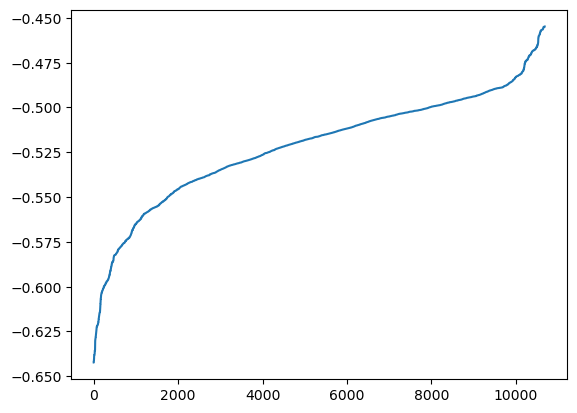

In [10]:
### finding the value of the threshold
scores_train = find_threshold(df_non_scaled_train)

In [11]:
### veryfying the scores to pass for the next function
scores_train

array([-0.64229714, -0.64229714, -0.64066232, ..., -0.4547879 ,
       -0.4547879 , -0.4547879 ])

In [12]:
### from the graph the sharp drop is around -0.60, so we use -0.60 to find the value of the contamination
find_contamination(df_non_scaled_train, scores_train, threshold = -0.60)

239
0.02237199288589342


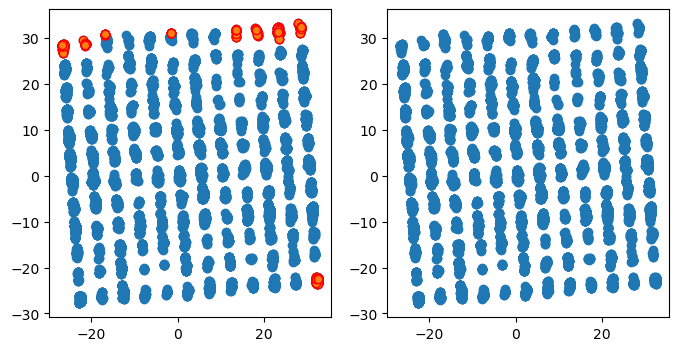

In [13]:
### taking contamination as 0.03(to round off the things) and plotting the outliers
outliers_isolation_forest(df_non_scaled_train, contamination = 0.03)

##### ================ Local outlier factor (LOF) =====================

In [14]:
### for the lof, I considered n_neighbors as 5 and n = 4, algorithm = 'auto' and leaf_size = 30
### as for the local outliers we wanna detect wuth respect to the closest clusters rather than
### finding out the overall outliers

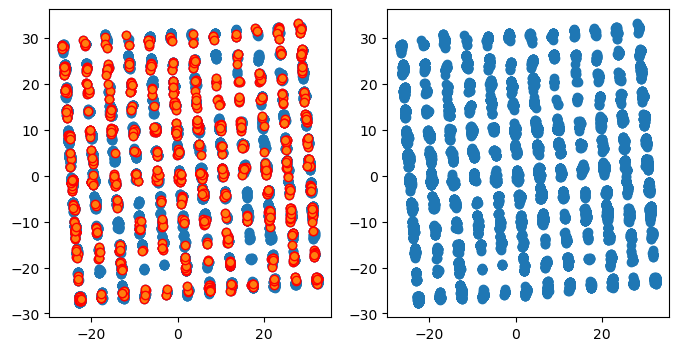

In [15]:
### n = 5
outliers_lof(df_non_scaled_train, n = 5)

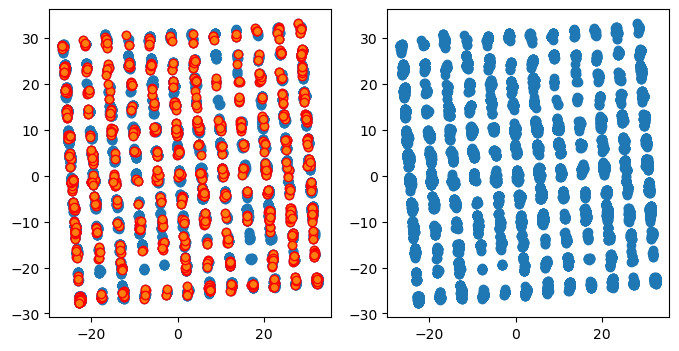

In [16]:
### n = 4
outliers_lof(df_non_scaled_train, n = 4)

##### =============== DBScan for outliers ==================

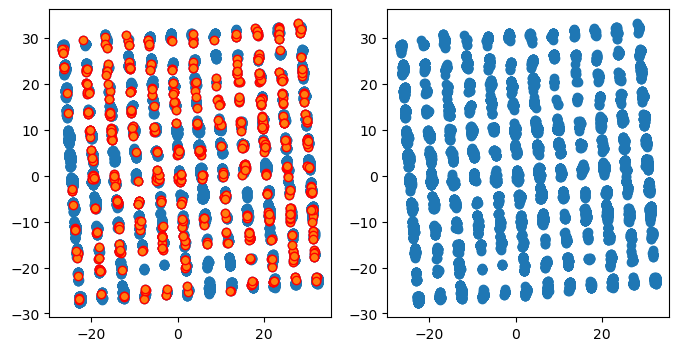

In [17]:
### taking eps as 0.18 (one from the clustering phase)
outliers_dbscan(df_non_scaled_train, eps = 0.18)

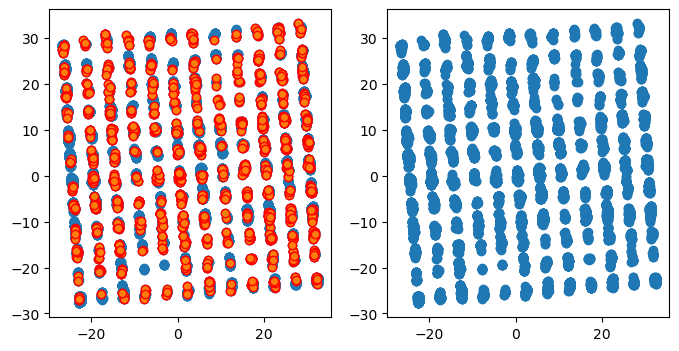

In [18]:
### taking eps as 0.1
outliers_dbscan(df_non_scaled_train, eps = 0.1)

### *************** scaled data : Test ****************

In [9]:
### loading the data
df_non_scaled_test = load_data(df_non_scaled_test_path)
df_non_scaled_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [10]:
### checking the nan
get_nan_duplicates_shape(df_non_scaled_test)

Shape : (2671, 14) 
Duplicates : 28 
Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64


In [11]:
### checking the shape
get_shape(df_non_scaled_test)

(2671, 14)

In [23]:
### reducing the dimensons to 2 using the pca
df_non_scaled_test = reduce_dim(df_non_scaled_test)
df_non_scaled_test

array([[  4.77807982,   1.61253469],
       [ -4.58243091,  -4.53695172],
       [ -7.62137906, -26.14526578],
       ...,
       [ 24.6052906 ,   3.66368647],
       [-23.64474298, -12.42150464],
       [ 31.05312136,  -7.72145754]])

In [24]:
### veryfying the dimensons of the reduced data
get_shape(df_non_scaled_test)

(2671, 2)

##### =================== Isolation forest =================

[-0.62810152 -0.62810152 -0.6280134  ... -0.45488262 -0.45468438
 -0.4543131 ]


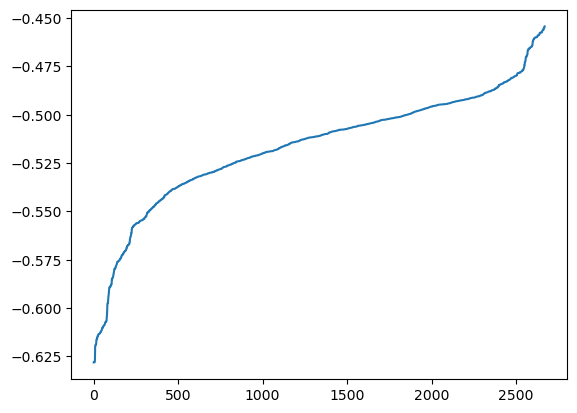

In [25]:
### finding the value of the threhold for the contamination
scores_test = find_threshold(df_non_scaled_test)

In [26]:
### checking the scores to pass to the next function
scores_test

array([-0.62810152, -0.62810152, -0.6280134 , ..., -0.45488262,
       -0.45468438, -0.4543131 ])

In [27]:
### taking the threshold as -0.61 and getting the value of the contamination
find_contamination(df_non_scaled_test, scores_test, threshold = -0.61)

55
0.020591538749532012


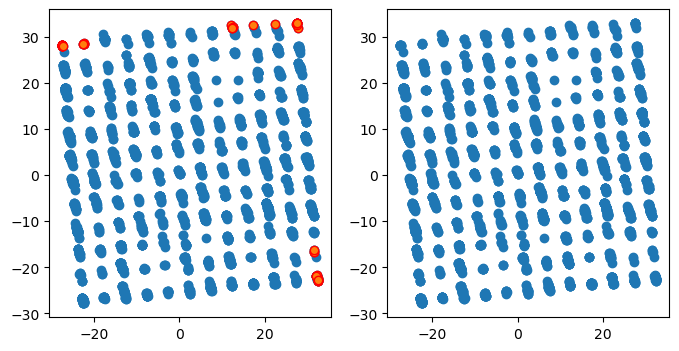

In [28]:
### taking the contamination as 0.02 to round off the things
outliers_isolation_forest(df_non_scaled_test, contamination = 0.02)

##### ================= Local outliers factor (LOF) =====================

In [33]:
### same as we did on the train data, I will take n = 5 and 4

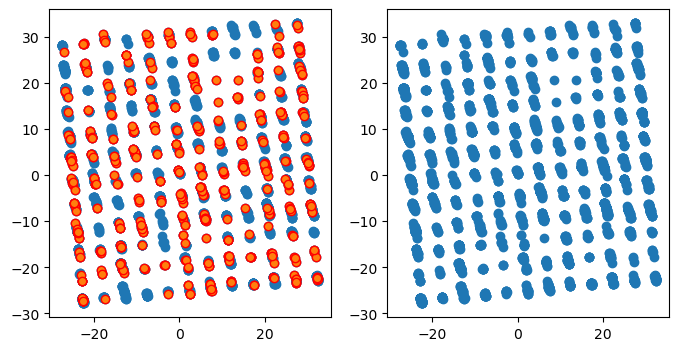

In [29]:
### taking n = 5
outliers_lof(df_non_scaled_test, n = 5)

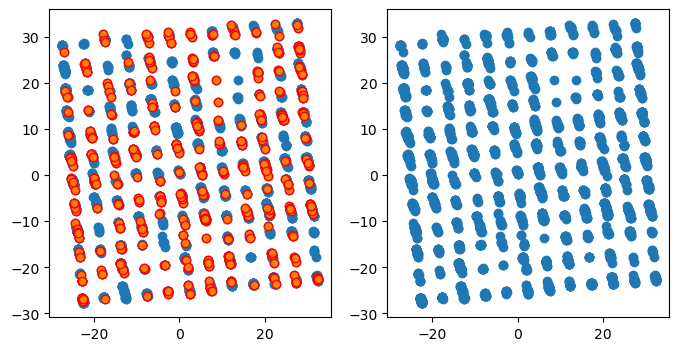

In [30]:
### taking n = 4
outliers_lof(df_non_scaled_test, n = 4)

##### ============= DBScan for anomaly detection ================

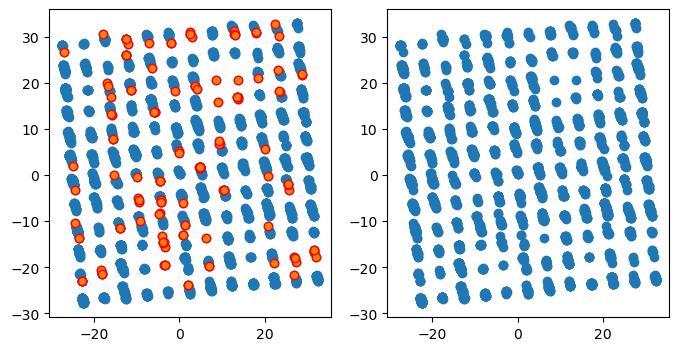

In [31]:
### taking eps as 0.80 from the clustering
outliers_dbscan(df_non_scaled_test, eps = 0.80)

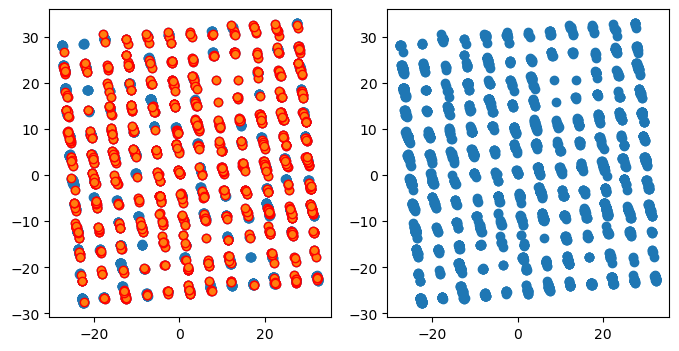

In [32]:
### taking the eps as 0.1
outliers_dbscan(df_non_scaled_test, eps = 0.1)